In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile
import os

# Define the zip file path (use the Google Drive path)
zip_file_path = "/content/drive/My Drive/UTKFace.zip"

# Define the extraction directory
extract_dir = "/content/UTKFace"

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check the extracted files
extracted_files = os.listdir(extract_dir)
print(f"Extracted files: {len(extracted_files)}")


Extracted files: 1


In [3]:
import os

# List all files and directories in the extracted folder
extracted_files = os.listdir(extract_dir)
print(f"Extracted files and directories: {extracted_files}")


Extracted files and directories: ['UTKFace']


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
import os
from pathlib import Path

In [5]:

# Define the directory path
path = "/content/UTKFace/UTKFace"
all_files = os.listdir(path)
print(f"Extracted files and directories: {all_files}")
# List all files and directories in the specified path
all_files = os.listdir(path)
print("All files in directory:", all_files)


Extracted files and directories: ['10_0_0_20170110224549512.jpg.chip.jpg', '23_1_3_20170119164606005.jpg.chip.jpg', '30_1_2_20170105170141222.jpg.chip.jpg', '2_0_2_20170110212538628.jpg.chip.jpg', '40_0_0_20170117142017783.jpg.chip.jpg', '55_0_0_20170117155215077.jpg.chip.jpg', '50_0_3_20170119205102983.jpg.chip.jpg', '26_1_3_20170117173846653.jpg.chip.jpg', '35_0_0_20170117191246180.jpg.chip.jpg', '55_0_0_20170120221314028.jpg.chip.jpg', '65_0_0_20170111203730182.jpg.chip.jpg', '20_1_3_20170104231536521.jpg.chip.jpg', '24_0_2_20170116165033311.jpg.chip.jpg', '28_1_1_20170113003529300.jpg.chip.jpg', '65_0_0_20170117162848739.jpg.chip.jpg', '35_0_1_20170116002407914.jpg.chip.jpg', '24_1_2_20170116173423718.jpg.chip.jpg', '26_1_1_20170116153240337.jpg.chip.jpg', '27_1_2_20170116173022576.jpg.chip.jpg', '54_0_0_20170104184603397.jpg.chip.jpg', '29_1_1_20170115235359510.jpg.chip.jpg', '58_0_0_20170113185354432.jpg.chip.jpg', '24_1_2_20170116171557699.jpg.chip.jpg', '39_0_0_2017010418494184

In [6]:
print(len(all_files))

23703


In [7]:
print(all_files[:5])

['10_0_0_20170110224549512.jpg.chip.jpg', '23_1_3_20170119164606005.jpg.chip.jpg', '30_1_2_20170105170141222.jpg.chip.jpg', '2_0_2_20170110212538628.jpg.chip.jpg', '40_0_0_20170117142017783.jpg.chip.jpg']


In [8]:
np.random.seed(42)
np.random.shuffle(all_files)

In [9]:
print(len(all_files))

23703


In [10]:
age_labels, gender_labels , image_paths =[],[],[]
for file in all_files:
    image_paths.append(file)
    temp = file.split("_")
    age_labels.append(temp[0])

    gender_labels.append(temp[1])


In [11]:
image_paths

['13_0_0_20170110224337867.jpg.chip.jpg',
 '26_1_1_20170116203803077.jpg.chip.jpg',
 '1_0_2_20161219222832191.jpg.chip.jpg',
 '26_0_2_20170116182453051.jpg.chip.jpg',
 '21_1_4_20170103223237335.jpg.chip.jpg',
 '29_0_0_20170104205704132.jpg.chip.jpg',
 '49_0_1_20170113135511444.jpg.chip.jpg',
 '27_0_0_20170116220751583.jpg.chip.jpg',
 '31_0_4_20170103235207122.jpg.chip.jpg',
 '45_1_0_20170117135025030.jpg.chip.jpg',
 '1_0_2_20161219204736996.jpg.chip.jpg',
 '18_1_0_20170117140751537.jpg.chip.jpg',
 '21_0_4_20170103225103768.jpg.chip.jpg',
 '1_1_0_20161219154510229.jpg.chip.jpg',
 '80_0_0_20170117173616376.jpg.chip.jpg',
 '58_0_0_20170104213209283.jpg.chip.jpg',
 '24_0_2_20170116165028531.jpg.chip.jpg',
 '30_0_3_20170119195740600.jpg.chip.jpg',
 '2_0_3_20161219225707719.jpg.chip.jpg',
 '72_0_0_20170111210555874.jpg.chip.jpg',
 '24_1_0_20170117150740282.jpg.chip.jpg',
 '26_0_0_20170117200045150.jpg.chip.jpg',
 '25_0_0_20170117143439000.jpg.chip.jpg',
 '50_0_3_20170117181143891.jpg.chip.jp

In [12]:
data = pd.DataFrame()
data["image"] = image_paths
data["age"] = age_labels
data["gender"] = gender_labels

In [13]:
data.head()

,image,age,gender
0,13_0_0_20170110224337867.jpg.chip.jpg,13,0
1,26_1_1_20170116203803077.jpg.chip.jpg,26,1
2,1_0_2_20161219222832191.jpg.chip.jpg,1,0
3,26_0_2_20170116182453051.jpg.chip.jpg,26,0
4,21_1_4_20170103223237335.jpg.chip.jpg,21,1


In [14]:
gender_dict = {
    0 : "Male",
    1 : "Female"
}

In [15]:
print(data.dtypes)

image     object
age       object
gender    object
dtype: object


In [16]:
data = data.astype({"age":"float32","gender":"int32"})

In [17]:
print(data.dtypes)

image      object
age       float32
gender      int32
dtype: object


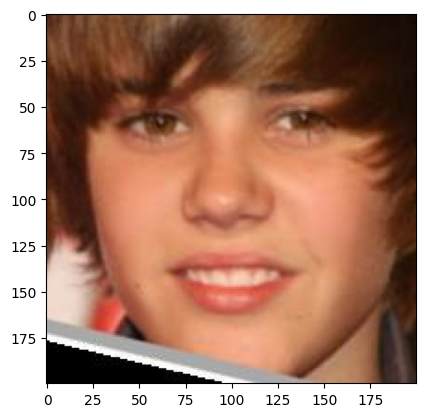

In [18]:
img = Image.open(path + "/" + data.image[0])
plt.imshow(img)

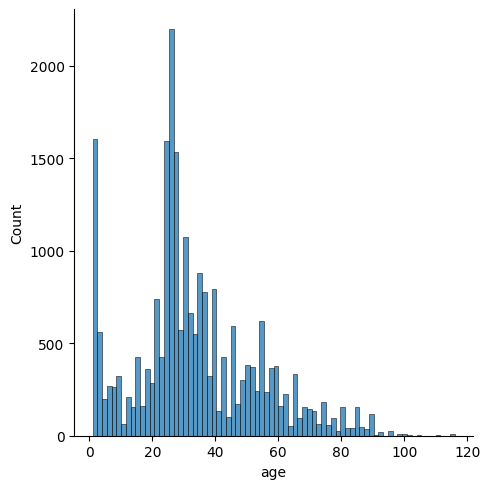

In [19]:
sns.displot(data.age)

[Text(0.5, 1.0, 'Gender Distribution')]

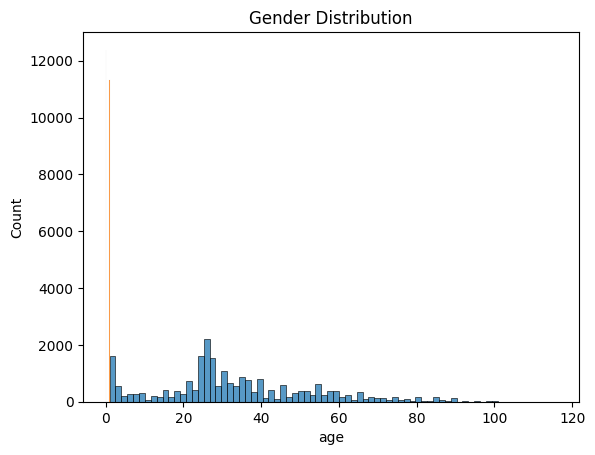

In [20]:
# Visualize distributions
sns.histplot(data=data, x="age").set(title="Age Distribution")
sns.histplot(data=data, x="gender").set(title="Gender Distribution")

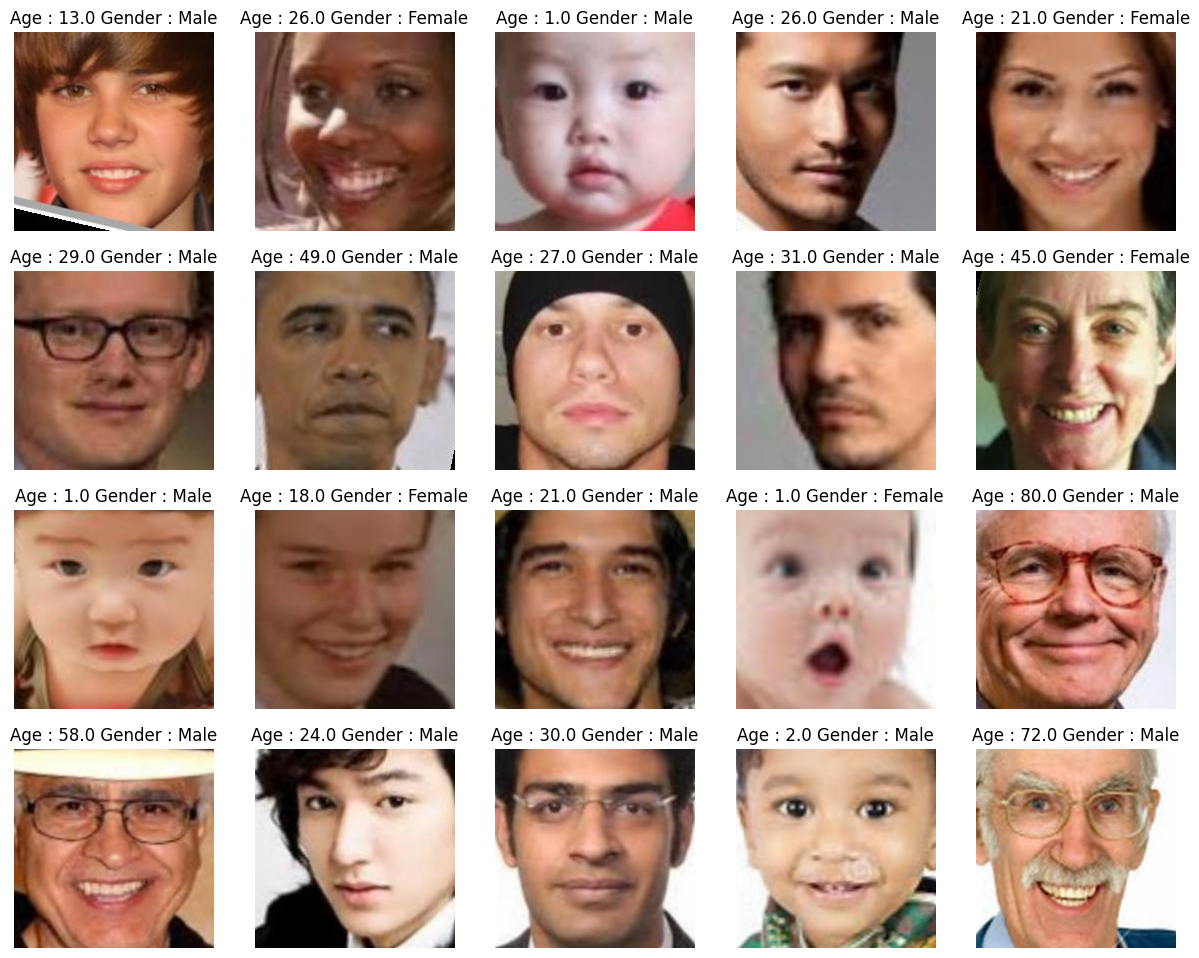

In [21]:
from keras.preprocessing.image import load_img
files = data.iloc[0:20]
plt.figure(figsize=(15,15))

for index , file , age , gender in files.itertuples():
  plt.subplot(5,5,index+1)
  img = load_img(path + "/" + file)
  img = np.array(img)
  plt.imshow(img)
  plt.title(f"Age : {age} Gender : {gender_dict[gender]}")
  plt.axis("off")

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23703 entries, 0 to 23702
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   23703 non-null  object 
 1   age     23703 non-null  float32
 2   gender  23703 non-null  int32  
dtypes: float32(1), int32(1), object(1)
memory usage: 370.5+ KB


In [23]:
#Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Initialize the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rescale=1./255,          # Rescale pixel values
    rotation_range=30,       # Random rotation
    width_shift_range=0.2,   # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Random horizontal flip
    fill_mode='nearest'      # Fill missing pixels
)

[Text(0.5, 1.0, 'Age Distribution')]

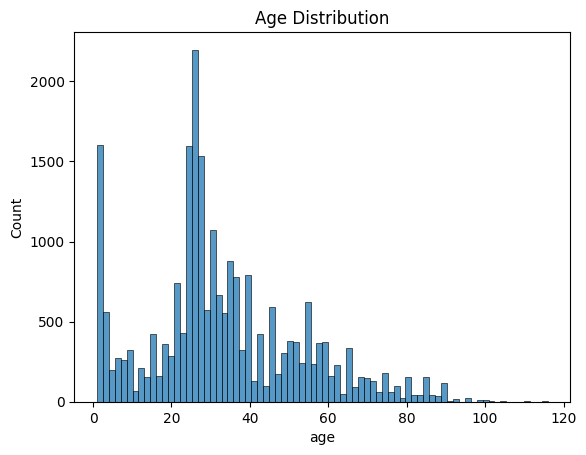

In [24]:
sns.histplot(data = data ,x="age").set(title="Age Distribution")

[Text(0.5, 1.0, 'Gender Distribution')]

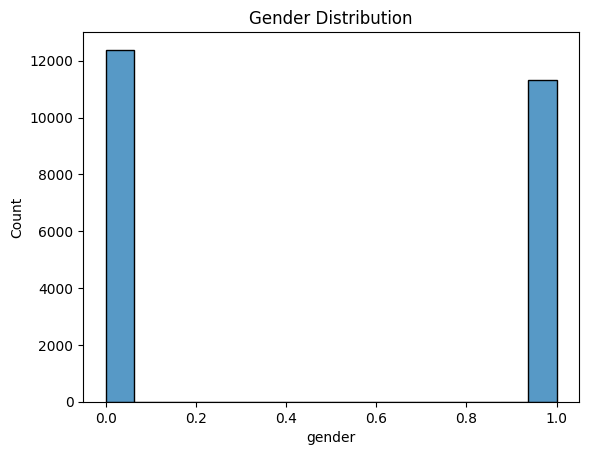

In [25]:
sns.histplot(data = data , x = "gender").set(title= "Gender Distribution")

<Axes: xlabel='gender'>

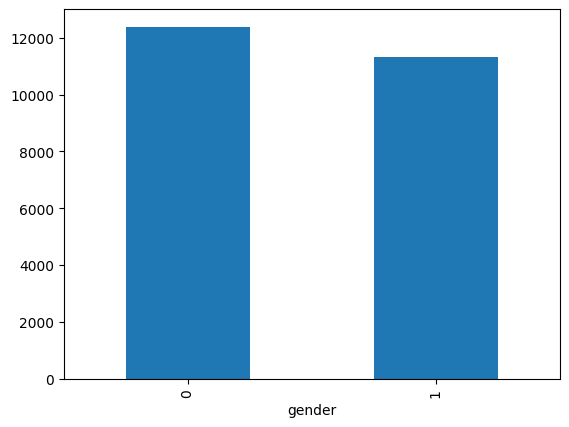

In [26]:
data['gender'].value_counts().plot(kind='bar')


In [27]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(data , test_size = 0.2 , random_state= 42)


In [28]:
train.head()

,image,age,gender
17856,36_0_2_20170104165035320.jpg.chip.jpg,36.0,0
13625,26_0_2_20170116165341590.jpg.chip.jpg,26.0,0
17180,20_1_2_20170116170359820.jpg.chip.jpg,20.0,1
7648,1_1_0_20170109190455518.jpg.chip.jpg,1.0,1
23641,26_1_1_20170112231645231.jpg.chip.jpg,26.0,1


In [29]:
train.shape

(18962, 3)

In [30]:
test.shape

(4741, 3)

In [31]:
x_train = []
for file in train.image:
  img = load_img(path + "/" + file , color_mode = "grayscale" )
  img = img.resize((128,128), Image.Resampling.LANCZOS)
  img = np.array(img)
  x_train.append(img)


x_train = np.array(x_train)

x_train = x_train.reshape(len(x_train),128,128,1)

In [32]:
x_train = x_train/255

In [33]:
y_gender = np.array(train.gender)
y_age = np.array(train.age)

In [34]:
input_size = (128,128,1)

In [35]:
from keras.models import Model
from keras.layers import Input , Conv2D , BatchNormalization , MaxPooling2D , Flatten , Dense ,Dropout
from keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2




inputs = Input(shape= input_size)

#First Conv Block
X = Conv2D(512,(3,3),activation = "relu",kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis=3)(X)
X = MaxPooling2D((3,3))(X)
X = Dropout(0.3)(X)

#2nd Conv Block
X = Conv2D(256,(3,3),activation = "relu")(X)
X = BatchNormalization()(X)
X = MaxPooling2D((2,2),strides=(2,2))(X)
X = Dropout(0.3)(X)

#3rd Conv Block
X = Conv2D(128,(3,3),activation = "relu")(X)
X = MaxPooling2D((2,2))(X)
X = Dropout(0.3)(X)

#4th Conv Block
X = Conv2D(64,(3,3),activation = "relu")(X)
X = MaxPooling2D((2,2))(X)
X = Dropout(0.3)(X)

#Flatten and Dense Layer
X = Flatten()(X)

dense_1 = Dense(256,activation = "relu",kernel_regularizer = l2(0.01))(X)
drop_out_1 = Dropout(0.4)(dense_1)

age_dense_1 = Dense(512,activation = "relu")(X)
age_dense_2 = Dense(256, activation="relu")(age_dense_1)


output_1 = Dense(1,activation = "sigmoid" , name = "Gender_Output")(drop_out_1)
output_2 = Dense(1,activation = "linear" , name = "Age_Output")(age_dense_2)

model = Model(inputs = inputs , outputs = [output_1 , output_2])




In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError, Accuracy
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError

# Define your optimizer with a specific learning rate
optimizer = Adam(learning_rate=0.0005)  # Lower learning Rate for fine Tuning

model.compile(
    optimizer = optimizer,
    loss = ["binary_crossentropy","mae"],
    loss_weights = [1.0,2.0],
    metrics = [["accuracy"],[MeanAbsoluteError()]]
)

# Callbacks for early stopping
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
    restore_best_weights=True
)





In [37]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 126, 126, 512)  │          5,120 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 126, 126, 512)  │          2,048 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 42, 42, 512)    │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 42, 42, 512)    │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 40, 40, 256)    │      1,179,904 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 40, 40, 256)    │          1,024 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 20, 20, 256)    │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 20, 20, 256)    │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 18, 18, 128)    │        295,040 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 9, 9, 128)      │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 9, 9, 128)      │              0 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 7, 7, 64)       │         73,792 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 3, 3, 64)       │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 3, 3, 64)       │              0 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 576)            │              0 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)        

 Total params: 2,131,906 (8.13 MB)

 Trainable params: 2,130,370 (8.13 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [38]:
model_history = model.fit(x = x_train , y = [y_gender,y_age],batch_size = 32 , epochs = 20, validation_split=0.1)

Epoch 1/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 103s 161ms/step - Age_Output_mean_absolute_error: 14.5966 - Gender_Output_accuracy: 0.5959 - loss: 32.7826 - val_Age_Output_mean_absolute_error: 20.1900 - val_Gender_Output_accuracy: 0.6769 - val_loss: 42.1636
Epoch 2/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 114s 135ms/step - Age_Output_mean_absolute_error: 10.7072 - Gender_Output_accuracy: 0.7129 - loss: 22.9387 - val_Age_Output_mean_absolute_error: 16.0607 - val_Gender_Output_accuracy: 0.7454 - val_loss: 33.1651
Epoch 3/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 84s 139ms/step - Age_Output_mean_absolute_error: 9.2670 - Gender_Output_accuracy: 0.7351 - loss: 19.4684 - val_Age_Output_mean_absolute_error: 13.5463 - val_Gender_Output_accuracy: 0.6937 - val_loss: 27.9002
Epoch 4/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 81s 138ms/step - Age_Output_mean_absolute_error: 8.3864 - Gender_Output_accuracy: 0.7510 - loss: 17.4629 - val_Age_Output_mean_absolute_error: 9.7875 - val_Gender_Output_accuracy: 0.7791 - val_loss: 20.1486
Epoch

In [39]:
# Prepare the test set images
x_test = []
for file in test.image:
    img = load_img(path + "/" + file, color_mode="grayscale")
    img = img.resize((128, 128), Image.Resampling.LANCZOS)
    img = np.array(img)
    x_test.append(img)

x_test = np.array(x_test)

# Reshape the test set images to match the input shape of the model
x_test = x_test.reshape(len(x_test), 128, 128, 1)

# Normalize the test images (rescale pixel values between 0 and 1)
x_test = x_test / 255.0

# Prepare the actual test labels
y_test_gender = np.array(test.gender)
y_test_age = np.array(test.age)

# Predict gender and age on the test set
predictions = model.predict(x_test)

# Gender predictions (rounding because output is between 0 and 1)
gender_predictions = np.round(predictions[0])

# Age predictions
age_predictions = predictions[1]

# Convert gender predictions back to labels (0 for Male, 1 for Female)
gender_predicted_labels = [gender_dict[int(gender)] for gender in gender_predictions]

# Show some sample predictions
for i in range(5):  # Show the first 5 test predictions
    print(f"Image: {test.image.iloc[i]}")
    print(f"Predicted Gender: {gender_predicted_labels[i]}")
    print(f"Predicted Age: {age_predictions[i][0]:.2f}")
    print(f"Actual Gender: {gender_dict[test.gender.iloc[i]]}")
    print(f"Actual Age: {test.age.iloc[i]}")
    print("\n")


149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step
Image: 40_0_0_20170120221110988.jpg.chip.jpg
Predicted Gender: Male
Predicted Age: 27.88
Actual Gender: Male
Actual Age: 40.0


Image: 25_0_2_20170116165101483.jpg.chip.jpg
Predicted Gender: Male
Predicted Age: 21.38
Actual Gender: Male
Actual Age: 25.0


Image: 35_1_0_20170117185628434.jpg.chip.jpg
Predicted Gender: Female
Predicted Age: 25.63
Actual Gender: Female
Actual Age: 35.0


Image: 45_0_0_20170117192031378.jpg.chip.jpg
Predicted Gender: Male
Predicted Age: 30.45
Actual Gender: Male
Actual Age: 45.0


Image: 26_0_3_20170119180445972.jpg.chip.jpg
Predicted Gender: Male
Predicted Age: 32.04
Actual Gender: Male
Actual Age: 26.0




<ipython-input-39-02a17eb7d400>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gender_predicted_labels = [gender_dict[int(gender)] for gender in gender_predictions]


In [40]:
from sklearn.metrics import accuracy_score, mean_absolute_error , mean_squared_error

# Accuracy for gender prediction
gender_accuracy = accuracy_score(y_test_gender, gender_predictions)
print(f"Gender Prediction Accuracy: {gender_accuracy:.2f}")

# Mean Absolute Error for age prediction
age_mae = mean_absolute_error(y_test_age, age_predictions)
print(f"Age Prediction Mean Absolute Error: {age_mae:.2f}")

# Mean Squared Error for age prediction
age_mse = mean_squared_error(y_test_age, age_predictions)
print(f"Age Prediction Mean Squared Error: {age_mse:.2f}")


Gender Prediction Accuracy: 0.85
Age Prediction Mean Absolute Error: 6.07
Age Prediction Mean Squared Error: 75.36
